# Numerične metode v tehniki

**Datum**: 18/10/2023

**Avtor**: Aleksander Grm

## Poglavje 1 - Napake pri računanju

Numerične metode so metode, ki v celoti temeljijo na vrtenju števil. Na koncu dneva je vedno potrebno nekaj izračunati, na takšen ali drugačen način.

S tem so povezane tudi napake pri izračunu. V tem poglavju si bomo pogledali izvore in obvladovanje napake pri različnih računskih metodah!

### Primer

Obravnavaj približen način izračuna za naslednjo algebraično enačbo

$$
x^2 + \varepsilon x - 1 = 0,
$$

kjer igra parameter $\varepsilon$ vlogo igre drame v postopku reševanja. Njeno točno rešitev poznamo in je 

$$
x_{1/2} = -\frac{1}{2} \varepsilon \pm \sqrt{1 + \frac{1}{4} \varepsilon^2}
$$

Tako lahko vsak približen način izračuna primerjamo z znano rešitvijo in ocenimo napako izračuna.

<hr>

**1. Reševanje z razvojem v vrsto**

Za majhne vrednosti parametra $\varepsilon \ll 1$, lahko koren razvijemo v vrsto in dobimo razultat, ki je rešljiv z navadnim kalkulatorjem

$$
\sqrt{1 + \frac{1}{4} \varepsilon^2} \approx 1 + \frac{1}{8}\varepsilon^2 - \frac{1}{128}\varepsilon^4 + \mathcal{O}(\varepsilon^5)  
$$

tako je potem rešitev poenostavljena

$$
x_{1/2} = 
\begin{cases}
1 - \frac{1}{2}\varepsilon + \frac{1}{8}\varepsilon^2 - \frac{1}{128}\varepsilon^4 + \mathcal{O}(\varepsilon^5) \\
-1 - \frac{1}{2}\varepsilon - \frac{1}{8}\varepsilon^2 + \frac{1}{128}\varepsilon^4 + \mathcal{O}(\varepsilon^5)
\end{cases}
$$

In [ ]:
import math as mat
import numpy as np
import matplotlib.pyplot as mpl

# MatPlotLib set fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['DejaVu Serif']

# MatPlotLib set LaTeX use
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

In [2]:
def func_series(e):
    x1 = 1 - e/2 + e**2/8 - e**4/128
    x2 = -1 - e/2 - e**2/8 + e**4/128

    return [x1,x2]

In [3]:
eps = np.linspace(0.1, 2, 30)

result = []
for ei in eps:
    sq = mat.sqrt(1 + ei**2/4)
    xe1 = -0.5*ei + sq
    xe2 = -0.5*ei - sq
    [x1, x2] = func_series(ei)
    result.append([[x1,xe1],[x2,xe2]])

result = np.array(result)

In [4]:
x1 = result[:,0] # prvi del rešitve
x2 = result[:,1] # drugi del rešitve

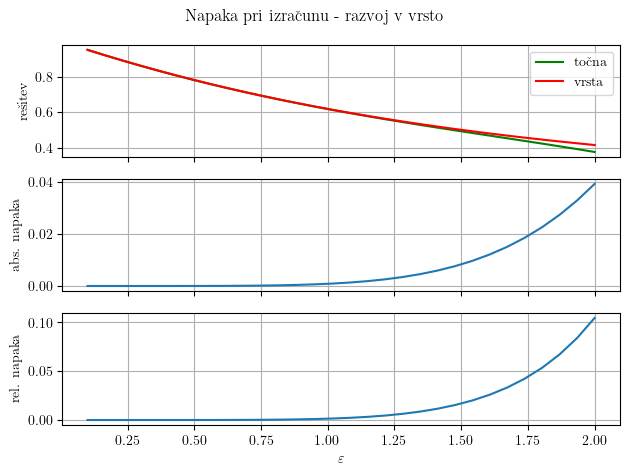

In [5]:
fig, ax = mpl.subplots(3)
fig.suptitle(r'Napaka pri izračunu - razvoj v vrsto') # Figure title

ax[0].plot(eps,x1[:,0],'g', label='točna')
ax[0].plot(eps,x1[:,1],'r', label='vrsta')
ax[1].plot(eps,np.abs(x1[:,0] - x1[:,1]))
ax[2].plot(eps,np.abs((x1[:,0] - x1[:,1])/x1[:,0]))

ax[0].set_xticklabels([])
ax[0].set_ylabel(r'rešitev')
ax[0].legend()
ax[0].grid()

ax[1].set_xticklabels([])
ax[1].set_ylabel(r'abs. napaka')
ax[1].grid()

ax[2].set_xlabel(r'$\varepsilon$')
ax[2].set_ylabel(r'rel. napaka')
ax[2].grid()

fig.tight_layout()
fig.savefig('sol_x1.pdf')

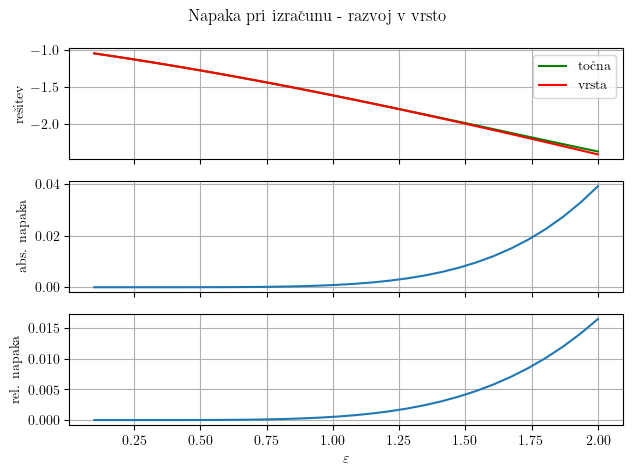

In [6]:
fig, ax = mpl.subplots(3)
fig.suptitle(r'Napaka pri izračunu - razvoj v vrsto') # Figure title

ax[0].plot(eps,x2[:,0],'g', label='točna')
ax[0].plot(eps,x2[:,1],'r', label='vrsta')
ax[1].plot(eps,np.abs(x2[:,0] - x2[:,1]))
ax[2].plot(eps,np.abs((x2[:,0] - x2[:,1])/x2[:,0]))

ax[0].set_xticklabels([])
ax[0].set_ylabel(r'rešitev')
ax[0].legend()
ax[0].grid()

ax[1].set_xticklabels([])
ax[1].set_ylabel(r'abs. napaka')
ax[1].grid()

ax[2].set_xlabel(r'$\varepsilon$')
ax[2].set_ylabel(r'rel. napaka')
ax[2].grid()

fig.tight_layout()
fig.savefig('sol_x2.pdf')

**2. Računanje z iterativno metodo**

Zaačetno enačbo $x^2 + \varepsilon x - 1 = 0$ nekoliko predrugačimo, da bo uporabna za izračun s pomočjo iterativne metode

$$
    x = \pm \sqrt{1 - \varepsilon x}.
$$

Vsaka rešitev te enačbe, je tako rešitev začetne enačbe in obratno!

Če sedaj uporabimo iterativni postopek, kjer seveda potrebujemo začetni približek rešitve, imamo tako rekurzivno enačbo, ki jo rešujemo

$$
    x_{n+1} = \pm \sqrt{1 - \varepsilon x_{n}}.
$$

Vzemimo samo pozitivno vejo in enako kakor prej, korenov ne znamo izračunat in si pomagamo z izračunom, ki ni natančen ampak približen. Enako je tudi tukaj potrebno oceniti napako.

Zgornjo enačbo razvijemo v vrsto

$$
    x_{n+1} = \sqrt{1 - \varepsilon x_{n}} \approx 1 - \frac{1}{2} \varepsilon x_{n}.
$$

Pri nekem $\varepsilon$ pričnemo z reševanjem, kjer lahko pričnemo z iterativnim postopkom za $x_0 = 1$ ($\varepsilon = 0$).

In [7]:
x_old = 1
err = 1e-8
e_par = np.linspace(0.1,1.5,100)

data = []
for ei in e_par:
    xe = -0.5*ei + mat.sqrt(1 + ei**2/4)
    sol = []
    idx = 0
    x_old = 1
    x = 1 - 0.5*ei*x_old
    
    while np.abs(x_old - x) > err:
        x_old = x
        x = 1 - 0.5*ei*x_old
        sol.append([idx, x])
        idx += 1

    data.append([ei, xe, np.array(sol)])

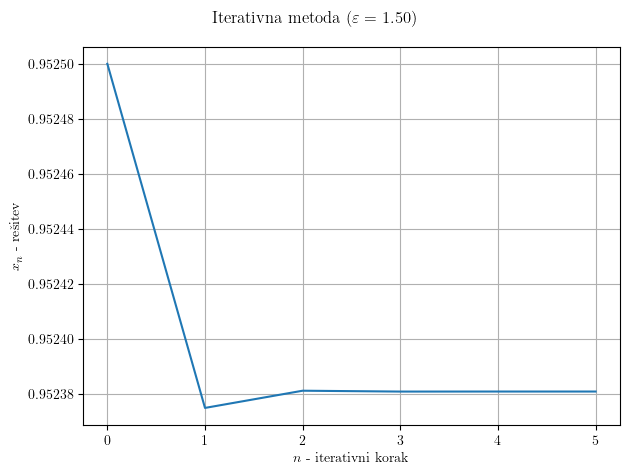

In [8]:
fig, ax = mpl.subplots()
fig.suptitle(r'Iterativna metoda ($\varepsilon = {:.2f}$)'.format(ei)) # Figure title

ax.plot(data[0][2][:,0],data[0][2][:,1])
        
ax.set_xlabel('$n$ - iterativni korak')
ax.set_ylabel(r'$x_n$ - rešitev')
ax.grid()
ax.autoscale_view()

fig.tight_layout()
fig.savefig('sol_iteracija.pdf')

In [9]:
error = []
for d in data:
    error.append([d[0], d[2][-1,0], np.abs(d[1] - d[2][-1,1])])
error = np.array(error)

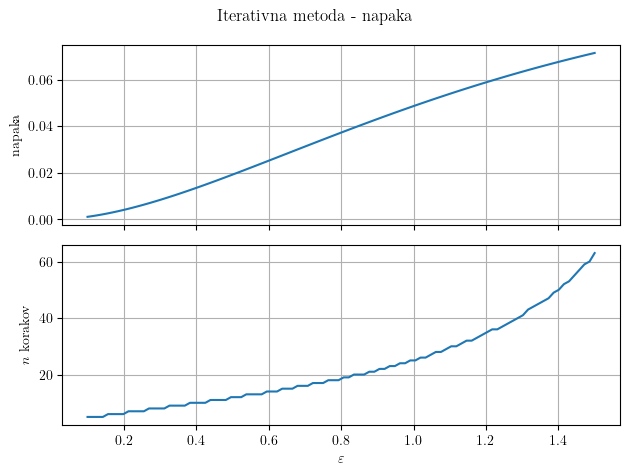

In [10]:
fig, ax = mpl.subplots(2)
fig.suptitle(r'Iterativna metoda - napaka'.format(ei)) # Figure title

ax[0].plot(error[:,0],error[:,2])
ax[1].plot(error[:,0],error[:,1])

ax[0].set_xticklabels([])
ax[0].set_ylabel(r'napaka')
ax[0].grid()

ax[1].set_xlabel(r'$\varepsilon$')
ax[1].set_ylabel(r'$n$ korakov')
ax[1].grid()

fig.tight_layout()
fig.savefig('err_iteracija.pdf')